📌 Please upload an image for face & eye detection:


Saving girl image.jpg to girl image (1).jpg


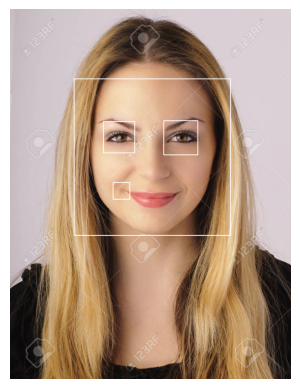

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# 🔹 Step 2: Load Pre-trained Haar Cascade Classifiers (Correct Paths)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# 🔹 Step 3: Function to Detect Faces & Eyes
def detect_faces_and_eyes(img):
    """
    Function to detect faces and eyes in an image using Haar cascades.
    - Draws a white rectangle around detected faces and eyes.
    - Returns the modified image.
    """
    face_img = img.copy()
    gray = cv2.cvtColor(face_img, cv2.COLOR_RGB2GRAY)  # Convert to grayscale for better detection

    # Detect faces
    face_rects = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

    for (x, y, w, h) in face_rects:
        # Draw face bounding box (Reduced thickness)
        cv2.rectangle(face_img, (x, y), (x + w, y + h), (255, 255, 255), 2)

        # Region of Interest (ROI) for eye detection inside the detected face
        face_roi = gray[y:y+h, x:x+w]
        color_face_roi = face_img[y:y+h, x:x+w]

        # Detect eyes within the face
        eye_rects = eye_cascade.detectMultiScale(face_roi, scaleFactor=1.1, minNeighbors=3)

        for (ex, ey, ew, eh) in eye_rects:
            cv2.rectangle(color_face_roi, (ex, ey), (ex + ew, ey + eh), (255, 255, 255), 2)

    return face_img

# 🔹 Step 4: Upload & Read an Image
print("📌 Please upload an image for face & eye detection:")
uploaded = files.upload()

# Get the uploaded file name
image_path = list(uploaded.keys())[0]

# Read the uploaded image
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for display

# 🔹 Step 5: Perform Face & Eye Detection
detected_img = detect_faces_and_eyes(img)

# 🔹 Step 6: Display the Result
plt.imshow(detected_img)
plt.axis("off")
plt.show()